# Gnuplot notebook
**Alisha Chakraborty**

This notebook is the different uses of gnuplot and example graphs using .csv files. To look at the files used to graph, look into the Gnuplot data files folder.

Examples are taken from http://gnuplot.sourceforge.net/demo_5.2/ and http://lowrank.net/gnuplot/intro/basic-e.html

## 2D Plotting

Here is the command to graph a data file. If you have a csv (comma separated value) file, then replace the .dat with .csv

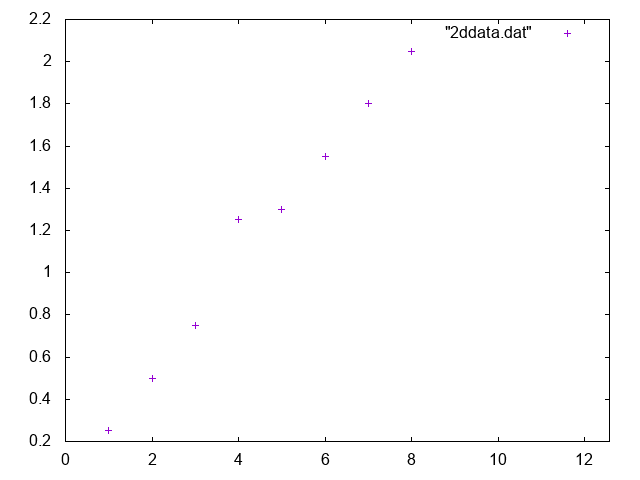

In [5]:
plot "2ddata.dat" #plots data in data file shown above

Here is how to create a line of best fit with a data set.

You can also see the Final Set of Parameters and the Asymptotic Standard Error


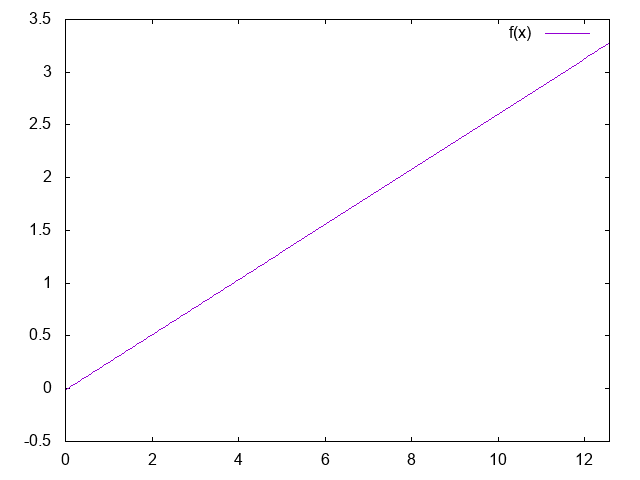

	> Implied independent variable y not found in fit function.
	> Assuming version 4 syntax with zerror in column 3 but no zerror keyword.

iter      chisq       delta/lim  lambda   m             b            
   0 7.7792327990e+03   0.00e+00  2.32e+01    1.000000e+00   1.000000e+00
   1 1.0018054875e+02  -7.67e+06  2.32e+00    1.801350e-01   5.694424e-01
   2 1.2996060784e+00  -7.61e+06  2.32e-01    2.585918e-01  -7.199424e-04
   3 1.2539454716e+00  -3.64e+03  2.32e-02    2.620435e-01  -1.518179e-02
   4 1.2539454686e+00  -2.45e-04  2.32e-03    2.620444e-01  -1.518554e-02
iter      chisq       delta/lim  lambda   m             b            

After 4 iterations the fit converged.
final sum of squares of residuals : 1.25395
rel. change during last iteration : -2.45397e-09

degrees of freedom    (FIT_NDF)                        : 6
rms of residuals      (FIT_STDFIT) = sqrt(WSSR/ndf)    : 0.457155
variance of residuals (reduced chisquare) = WSSR/ndf   : 0.208991
p-value of the Chisq distrib

In [4]:
f(x)=m*x + b #standard linear equation
fit f(x) "2ddata.dat" using 1:2:3 via m,b #makes data into a line of best fit
plot f(x) 

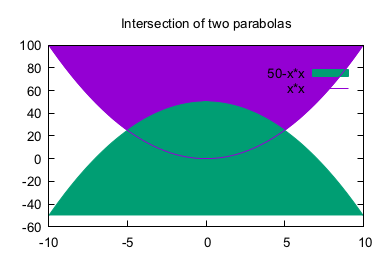

In [7]:
set title "Intersection of two parabolas"
plot x*x with filledcurves, 50-x*x with filledcurves, x*x with line lt 1
# plots both x*x and 50 -x*x with filled curves and graphs the intersection

In [6]:
# NOT WORKING
set ydata time
set timefmt "%y/%m/%d"
set yrange ["2018-08-05":"2019-07-28"]
set format y "%m/%d"
set timefmt "%y/%m/%d %H:%M"
set datafile separator ","
plot "minecraft.csv" using 1:3

An unknown error occured. Failed to read and display image file from gnuplot.


         Can't plot with an empty y range!



## 3D Plotting

Although 2d plotting is possible, Gnuplot is mostly used for 3d plotting. Here are examples of 3D plotting and different commands that change the graphs output

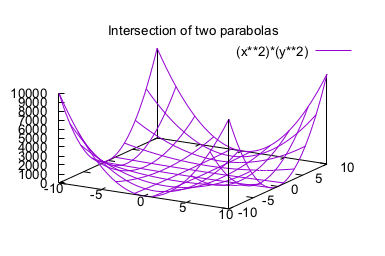

In [8]:
set ticslevel 0 #the zero of Z-Axis moves to on the XY plane.
splot (x**2)*(y**2) #splot makes  the zero-point of Z-Axis is placed above the XY plane which is corrected by the command above

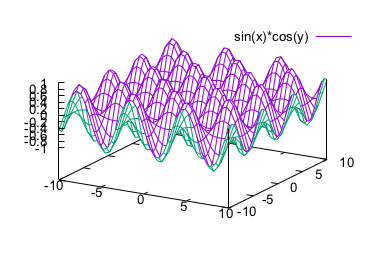

In [1]:
set hidden3d #enables hidden line removal for surface plotting
set isosample 40 #determines mesh size and creates a finer mesh 
splot sin(x)*cos(y)

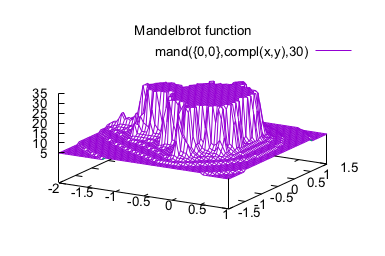

In [1]:
set title "Mandelbrot function"
unset parametric 
set mapping cartesian
set view 60,30,1,1 
set auto #sets autoscale
set isosamples 60
set hidden3d
compl(a,b)=a*{1,0}+b*{0,1}
mand(z,a,n) = n<=0 || abs(z)>100 ? 1:mand(z*z+a,a,n-1)+1
splot [-2:1][-1.5:1.5] mand({0,0},compl(x,y),30)     

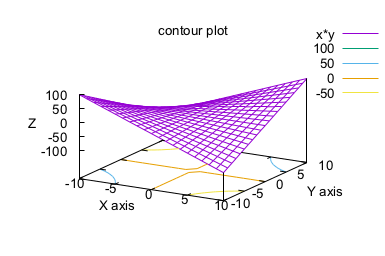

In [2]:
set samples 20
set isosamples 21
set xlabel "X axis"
set ylabel "Y axis"
set zlabel "Z " offset 1, 0
set view 60, 30, 0.85, 1.1 #sets the viewing angle for splots
set key at screen 1.0, 0.9 #enables a key (or legend) describing plots on a plot.
set style textbox opaque noborder margins 0.5, 0.5 #a set of line types and widths and point types and sizes

set title "contour plot"
set contour #enables contour drawing for surfaces. avaliable for splot only
splot x*y

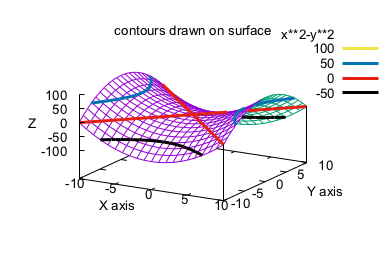

In [3]:
set title "contours drawn on surface"
set contour surface
splot x**2-y**2 with lines notitle, x**2-y**2 with lines nosurf lw 3

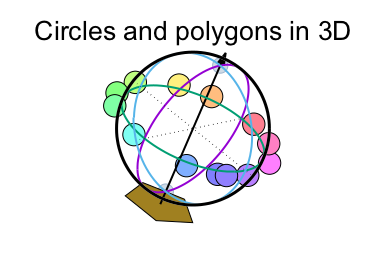

In [6]:
# Show placement of circles in 3D using
# - sampling
# - circle objects in axis coordinates
# - circle objects and labels in polar (cylindrical) coordinates
#
save_encoding = GPVAL_ENCODING
set encoding utf8

unset border
unset key
set angles degrees
set view 64, 302, 1.62, 1.0
set view azimuth 23.4
set view  equal xyz
set style data lines
set xzeroaxis
set yzeroaxis
set zzeroaxis
set xyplane at 0
unset tics
set xrange [ -1.1  : 1.1  ]
set yrange [ -1.1  : 1.1  ]
set zrange [ -1.1  : 1.1  ]
#
set title "Circles and polygons in 3D" font ",20"
set arrow from 0,0,-1.2 to 0,0,1.2 lw 2 filled
#
# Place circles as objects using Cartesian axis coordinates
#
set object 21 circle at 0,0,0  radius 1.0 fs empty border lc "black" lw 3 front
set object 22 circle at 0,0,1  radius 0.1 fs transparent solid 0.5 fc "slategray"
set object 23 circle at 0,0,-1 radius 0.1 fs transparent solid 0.5 fc "slategray"

#
# Pentagonal "base"
#
set obj 24 polygon from polar 0, 0.5, -1.2 to polar 72, 0.5, -1.2 to polar 144, 0.5, -1.2 to polar 216, 0.5, -1.2 to polar 288, 0.5, -1.2 to polar 0, 0.5, -1.2
set obj 24 fillstyle solid border border lc "black" back fc "olive"


#
# Plot symbols for Zodiac constellations in polar (actually cylindrical) coordinates
# Place a circle around the corresponding glyph
# Note: Many fonts do not provide glyphs for these symbols
#
array Zodiac[13] = ["♐", "♑", "♒", "♓", "♈", "♉", "♊", "♋", "♌", "♍", "♎", "♏", "⛎"] 
array Longitude[13] = [267., 300., 328., 352., 29., 53., 90., 118., 138., 174., 218., 241., 248.]
do for [i=1:13] {
    set label i Zodiac[i] at polar Longitude[i], 1.1, 0 center font ",15"
    set obj i circle at polar Longitude[i], 1.1, 0 radius char 1.5
    set obj i fs solid fc rgb hsv2rgb( Longitude[i]/360., 0.5, 1.0)
}

#
# plot sampled parametric circles
#
splot sample [u=0:360] '+' using (cos(u)):(0):(sin(u)) lw 2, \
             [u=0:360] '+' using (cos(u)):(sin(u)):(0) lw 2, \
             [u=0:360] '+' using (0):(cos(u)):(sin(u)) lw 2


## Matrices

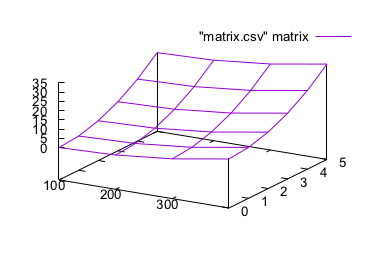

In [1]:
set xtics ("100" 0, "200" 1, "300" 2) #Fine control of the major (labelled) tics on the x axis
splot "matrix.csv" matrix with lines #uses lines 

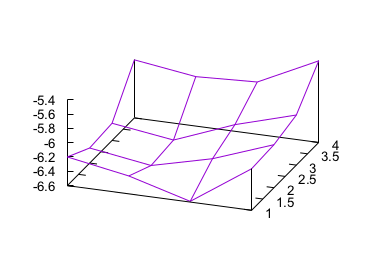

In [2]:
set view 50,20
set ticslevel 0
splot 'matrix data.dat' matrix nonuniform with lines t 

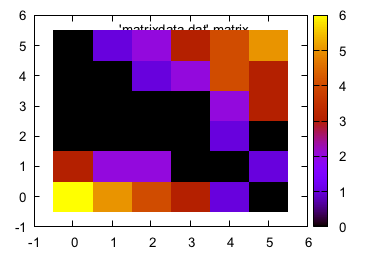

In [2]:
plot 'matrixdata.dat' matrix with image